## Importing Data & Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor    

In [2]:
df = pd.read_csv('../data/exports/health_landscape_clean.csv').drop(columns=['avgLifeExpec',
                                                                             'pct_diabetes_13'])

In [3]:
def fips_to_obj(df):
    df['FIPS'] = [int(i) for i in df['FIPS'].fillna(0)]
    df['FIPS'] = df['FIPS'].astype('object')
    fips_list = []
    for i in df['FIPS']:
        if len(str(i)) < 5:
            fips_list.append('0' + str(i))
        else:
            fips_list.append(str(i))
    df['FIPS'] = fips_list
    return df

df = fips_to_obj(df)

## Abridged EDA

### Correlations

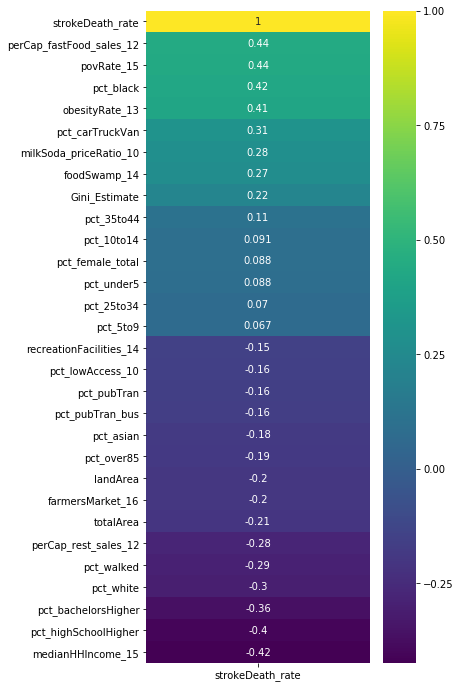

In [4]:
plt.figure(figsize=(5,12))
sns.heatmap(df.corr()[['strokeDeath_rate']].sort_values(by='strokeDeath_rate', ascending=False)\
    .iloc[np.r_[0:15, -15:0]], annot=True, cmap='viridis');

### Scatterplot

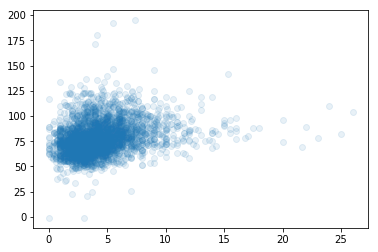

In [5]:
plt.scatter(df['foodSwamp_14'], df['strokeDeath_rate'], alpha = .1);

## Baseline

Beating 0.00 r2 score

## Simple OLS Model

In [6]:
X = df[['foodSwamp_14','pct_lowAccessInc_15','recreationFacilities_14', 'povRate_15','natAmenityIndex',
        'milkSoda_priceRatio_10', 'pct_black', 'pct_hispanicORlatino','pct_over65','totalArea']]
y = df['strokeDeath_rate']

lr = LinearRegression()
lr.fit(X, y)
print('Score:',lr.score(X, y))
print('Cross val score:',cross_val_score(lr, X, y, cv=5, scoring='explained_variance').mean())

Score: 0.3153522228762994
Cross val score: 0.2568363229996766


In [7]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       strokeDeath_rate   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     141.0
Date:                Fri, 10 May 2019   Prob (F-statistic):          3.48e-243
Time:                        14:41:02   Log-Likelihood:                -12379.
No. Observations:                3072   AIC:                         2.478e+04
Df Residuals:                    3061   BIC:                         2.485e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      57.5179      2.323     24.758      0.000      52.963      62.073
foodSwamp_14                0.9303      0.102      9.165      0.000       0.731       1.129
pct_lowAccessInc_15        -0.0561      0.033     -1.694      0.090      -0.121       0.009
recreationFacilities_14    -0.0542      0.008     -6.863      0.000      -0.070      -0.039
povRate_15                  0.7494      0.048     15.740      0.000       0.656       0.843
natAmenityIndex            -0.1074      0.277     -0.388      0.698      -0.650       0.436
milkSoda_priceRatio_10      7.7108      2.138      3.606      0.000       3.518      11.903
pct_black                  21.2804      2.241      9.497      0.000      16.887      25.674
pct_hispanicORlatino      -10.0091      2.131     -4.696      0.000     -14.188      -5.830
pct_over65                 -8.3898      6.344     -1.323      0.186     -20.828       4.049
totalArea                  -0.0013      0.000     -6.084      0.000      -0.002      -0.001
==============================================================================
Omnibus:                      604.707   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3575.970
Skew:                           0.801   Prob(JB):                         0.00
Kurtosis:                       8.037   Cond. No.                     4.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
pd.Series([variance_inflation_factor(X.values, i) 
            for i in range(X.shape[1])], 
            index=X.columns)

const                      89.200261
foodSwamp_14                1.189776
pct_lowAccessInc_15         1.137420
recreationFacilities_14     1.166298
povRate_15                  1.540199
natAmenityIndex             1.376809
milkSoda_priceRatio_10      1.402644
pct_black                   1.750550
pct_hispanicORlatino        1.405352
pct_over65                  1.325864
totalArea                   1.356419
dtype: float64

## Model 2: Controlling for Obesity Rate

In [9]:
X = df[['foodSwamp_14','pct_lowAccessInc_15','recreationFacilities_14', 'povRate_15','natAmenityIndex',
        'milkSoda_priceRatio_10', 'pct_black', 'pct_hispanicORlatino','pct_over65','totalArea','obesityRate_13']]
y = df['strokeDeath_rate']

lr = LinearRegression()
lr.fit(X, y)
print('Score:',lr.score(X, y))
print('Cross val score:',cross_val_score(lr, X, y, cv=5, scoring='explained_variance').mean())

Score: 0.33505136172455285
Cross val score: 0.27787120610136007


In [10]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       strokeDeath_rate   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     140.2
Date:                Fri, 10 May 2019   Prob (F-statistic):          2.22e-261
Time:                        14:41:02   Log-Likelihood:                -12334.
No. Observations:                3072   AIC:                         2.469e+04
Df Residuals:                    3060   BIC:                         2.477e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      35.9097      3.224     11.138      0.000      29.588      42.231
foodSwamp_14                0.8394      0.101      8.351      0.000       0.642       1.036
pct_lowAccessInc_15        -0.0601      0.033     -1.841      0.066      -0.124       0.004
recreationFacilities_14    -0.0368      0.008     -4.599      0.000      -0.052      -0.021
povRate_15                  0.5863      0.050     11.736      0.000       0.488       0.684
natAmenityIndex             0.8708      0.292      2.985      0.003       0.299       1.443
milkSoda_priceRatio_10      6.7899      2.110      3.218      0.001       2.653      10.926
pct_black                  18.5403      2.227      8.324      0.000      14.173      22.908
pct_hispanicORlatino       -6.0119      2.142     -2.806      0.005     -10.212      -1.811
pct_over65                 -5.1201      6.262     -0.818      0.414     -17.399       7.159
totalArea                  -0.0013      0.000     -6.149      0.000      -0.002      -0.001
obesityRate_13              0.6863      0.072      9.521      0.000       0.545       0.828
==============================================================================
Omnibus:                      609.884   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3654.292
Skew:                           0.805   Prob(JB):                         0.00
Kurtosis:                       8.095   Cond. No.                     4.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
pd.Series([variance_inflation_factor(X.values, i) 
            for i in range(X.shape[1])], 
            index=X.columns)

const                      176.815617
foodSwamp_14                 1.200616
pct_lowAccessInc_15          1.137609
recreationFacilities_14      1.230769
povRate_15                   1.745422
natAmenityIndex              1.571753
milkSoda_priceRatio_10       1.405599
pct_black                    1.780269
pct_hispanicORlatino         1.461476
pct_over65                   1.329864
totalArea                    1.356427
obesityRate_13               1.796801
dtype: float64